## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 17.4 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 25.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=17c4257b377d2ff190be52f1e65e4e67b731944d5844cb360f09435e202b8da4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d322

In [4]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [5]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [6]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  ucm
Please enter how many tweets to analyze:  20


In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  20
positive number:  3
negative number:  4
neutral number:  13


In [8]:
tweet_list[0:20]

,0
0,Fácil Top 5 películas del ucm!
1,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
2,@Peli_Comic Guardianes de la galaxia junto con...
3,Ver #GuardiansOfTheGalaxyVol3 es reír casi to...
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
5,RT @peterjordan100: Saiu video do Raluca e a g...
6,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
7,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
8,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...


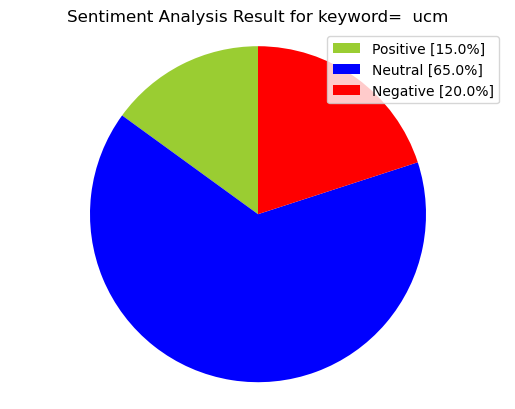

In [9]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [10]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [11]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Fácil Top 5 películas del ucm!,Fácil Top 5 películas del ucm!
1,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...","RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
2,@Peli_Comic Guardianes de la galaxia junto con...,@Peli_Comic Guardianes de la galaxia junto con...
3,Ver #GuardiansOfTheGalaxyVol3 es reír casi to...,Ver #GuardiansOfTheGalaxyVol3 es reír casi to...
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
5,RT @peterjordan100: Saiu video do Raluca e a g...,RT @peterjordan100: Saiu video do Raluca e a g...
6,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...
10,RT @JuanMLemus1: UCM PINAR DEL RÍO. ...,RT @JuanMLemus1: UCM PINAR DEL RÍO. ...
11,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...
12,@_CapClark1 @jackfreemanjr Hey thanks Jack! He...,@_CapClark1 @jackfreemanjr Hey thanks Jack! He...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Fácil Top 5 películas del ucm!,f cil top 5 pel culas del ucm
1,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...
2,@Peli_Comic Guardianes de la galaxia junto con...,comic guardianes de la galaxia junto con cap...
3,Ver #GuardiansOfTheGalaxyVol3 es reír casi to...,ver guardiansofthegalaxyvol3 es re r casi to...
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
5,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...
6,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...
10,RT @JuanMLemus1: UCM PINAR DEL RÍO. ...,ucm pinar del r o nos vemos en el ...
11,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...
12,@_CapClark1 @jackfreemanjr Hey thanks Jack! He...,capclark1 hey thanks jack hello mr clark...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_13749/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Fácil Top 5 películas del ucm!,f cil top 5 pel culas del ucm,0.50,0.500000,positive,0.000,0.735,0.265,0.2023
1,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
2,@Peli_Comic Guardianes de la galaxia junto con...,comic guardianes de la galaxia junto con cap...,0.25,0.500000,neutral,0.000,1.000,0.000,0.0000
3,Ver #GuardiansOfTheGalaxyVol3 es reír casi to...,ver guardiansofthegalaxyvol3 es re r casi to...,0.00,0.000000,negative,0.144,0.760,0.096,-0.2960
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.00,0.066667,negative,0.165,0.688,0.147,-0.1027
5,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @zebazcr: Ni se estrena y ya la odian. 😂\n\...,ni se estrena y ya la odian themarvels ...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
10,RT @JuanMLemus1: UCM PINAR DEL RÍO. ...,ucm pinar del r o nos vemos en el ...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
11,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
12,@_CapClark1 @jackfreemanjr Hey thanks Jack! He...,capclark1 hey thanks jack hello mr clark...,0.20,0.200000,positive,0.000,0.743,0.257,0.6369


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,8,57.14
positive,3,21.43
negative,3,21.43


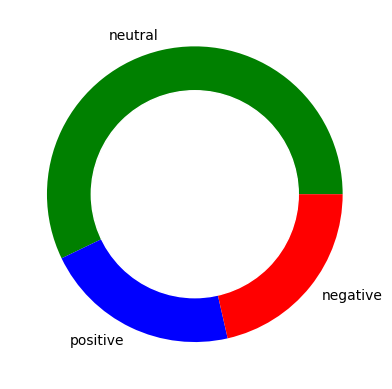

In [17]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



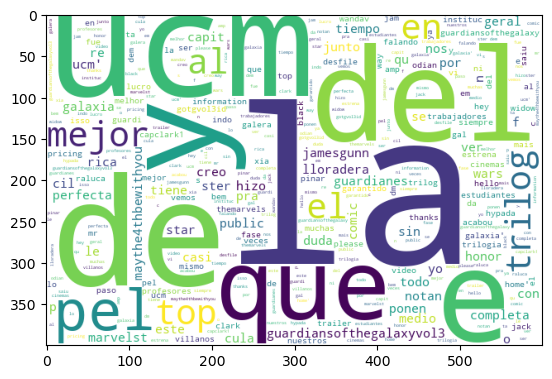

In [19]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

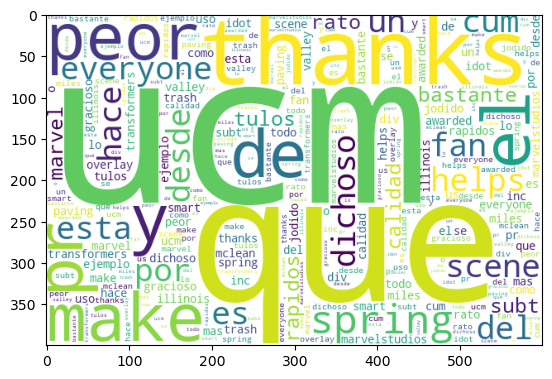

In [19]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

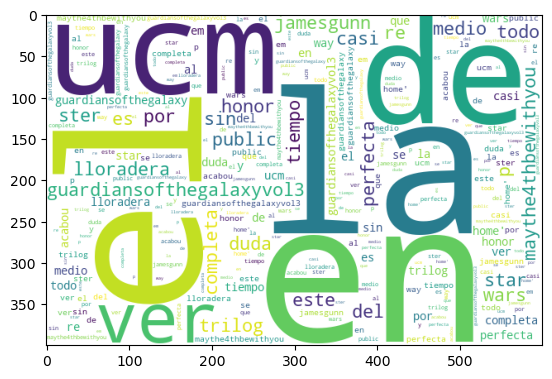

In [21]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

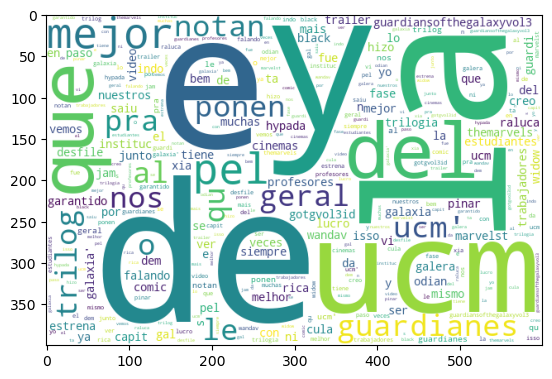

In [22]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)